In [3]:
library(tidyverse)

theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Test statistic for paired two-sample data

In [4]:
# DATA
x1 = c(14.976, 7.040, 11.588, 14.460, 6.876, 9.258, 10.444, 5.425, 12.508, 11.844, 7.695, 4.642, 6.916, 2.947, 10.423, 9.558, 10.783)
x2 = c(16.294, 8.406, 11.623, 15.667, 7.141, 10.679, 10.698, 6.28, 11.474, 13.021, 6.753, 4.477, 7.284, 4.308, 10.174, 9.618, 11.447)

xD = x2-x1
n = length(xD)

xD %>% round(3)

[1]  1.318  1.366  0.035  1.207  0.265  1.421  0.254  0.855 -1.034  1.177
[11] -0.942 -0.165  0.368  1.361 -0.249  0.060  0.664

In [5]:
# Calculate the sample statistic
sample.statistic = mean(xD)/(sd(xD)/sqrt(n))
sample.statistic

[1] 2.432445

[1] 0.01355386

[1] 0.02710773

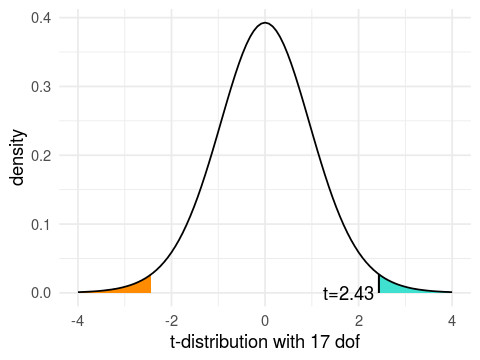

In [8]:
alpha = .05
qalpha = qt(1-alpha/2, df=n-1)

# Locate the sample statistic on the t-distribution 

options(repr.plot.width = 4, repr.plot.height = 3)

ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +

# Extreme areas
stat_function(fun = dt, args = list(df = n-1), geom = "area", xlim = c(sample.statistic,4), fill = "turquoise") +
stat_function(fun = dt, args = list(df = n-1), geom = "area", xlim = c(-4,-sample.statistic), fill = "darkorange") +

# # Critical regions
# stat_function(fun = dt, args = list(df = n-1), geom = "area", xlim = c(qalpha,4), fill = "red") +
# stat_function(fun = dt, args = list(df = n-1), geom = "area", xlim = c(-4,-qalpha), fill = "red") +

stat_function(fun = dt, args = list(df = n-1), color = "black") +
geom_segment(x = sample.statistic, xend = sample.statistic, y = 0, yend = dt(sample.statistic, df=n-1), linetype = 1, color = "black") +

annotate(geom = "text", label = paste0("t=",round(sample.statistic,2)), x = sample.statistic, y = 0.0, hjust= 1.1) +
labs(x = paste0("t-distribution with ",n," dof"), y = "density")

# Area equal or higher than the sample statistic ("one-tail" t-test)
1-pt(sample.statistic, df=n-1)

# Area equal or *more extreme* (both high and low) than the sample statistic ("two-tail" t-test)
2*(1-pt(sample.statistic, df=n-1))

In [10]:
sample.statistic
t.test(xD)

[1] 2.432445


	One Sample t-test

data:  xD
t = 2.4324, df = 16, p-value = 0.02711
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.06017009 0.87641814
sample estimates:
mean of x 
0.4682941 


In [11]:
t.test(x2,x1, paired=T)


	Paired t-test

data:  x2 and x1
t = 2.4324, df = 16, p-value = 0.02711
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06017009 0.87641814
sample estimates:
mean of the differences 
              0.4682941 


In [14]:
chisq.test

function (x, y = NULL, correct = TRUE, p = rep(1/length(x), length(x)), 
    rescale.p = FALSE, simulate.p.value = FALSE, B = 2000) 
{
    DNAME <- deparse(substitute(x))
    if (is.data.frame(x)) 
        x <- as.matrix(x)
    if (is.matrix(x)) {
        if (min(dim(x)) == 1L) 
            x <- as.vector(x)
    }
    if (!is.matrix(x) && !is.null(y)) {
        if (length(x) != length(y)) 
            stop("'x' and 'y' must have the same length")
        DNAME2 <- deparse(substitute(y))
        xname <- if (length(DNAME) > 1L || nchar(DNAME, "w") > 
            30) 
            ""
        else DNAME
        yname <- if (length(DNAME2) > 1L || nchar(DNAME2, "w") > 
            30) 
            ""
        else DNAME2
        OK <- complete.cases(x, y)
        x <- factor(x[OK])
        y <- factor(y[OK])
        if ((nlevels(x) < 2L) || (nlevels(y) < 2L)) 
            stop("'x' and 'y' must have at least 2 levels")
        x <- table(x, y)
        names(dimnames(x)) <- c(xname, yname)
        DNAME <- paste(paste(DNAME, collapse = "\n"), "and", 
            paste(DNAME2, collapse = "\n"))
    }
    if (any(x < 0) || anyNA(x)) 
        stop("all entries of 'x' must be nonnegative and finite")
    if ((n <- sum(x)) == 0) 
        stop("at least one entry of 'x' must be positive")
    if (simulate.p.value) {
        setMETH <- function() METHOD <<- paste(METHOD, "with simulated p-value\n\t (based on", 
            B, "replicates)")
        almost.1 <- 1 - 64 * .Machine$double.eps
    }
    if (is.matrix(x)) {
        METHOD <- "Pearson's Chi-squared test"
        nr <- as.integer(nrow(x))
        nc <- as.integer(ncol(x))
        if (is.na(nr) || is.na(nc) || is.na(nr * nc)) 
            stop("invalid nrow(x) or ncol(x)", domain = NA)
        sr <- rowSums(x)
        sc <- colSums(x)
        E <- outer(sr, sc, "*")/n
        v <- function(r, c, n) c * r * (n - r) * (n - c)/n^3
        V <- outer(sr, sc, v, n)
        dimnames(E) <- dimnames(x)
        if (simulate.p.value && all(sr > 0) && all(sc > 0)) {
            setMETH()
            tmp <- .Call(C_chisq_sim, sr, sc, B, E)
            STATISTIC <- sum(sort((x - E)^2/E, decreasing = TRUE))
            PARAMETER <- NA
            PVAL <- (1 + sum(tmp >= almost.1 * STATISTIC))/(B + 
                1)
        }
        else {
            if (simulate.p.value) 
                warning("cannot compute simulated p-value with zero marginals")
            if (correct && nrow(x) == 2L && ncol(x) == 2L) {
                YATES <- min(0.5, abs(x - E))
                if (YATES > 0) 
                  METHOD <- paste(METHOD, "with Yates' continuity correction")
            }
            else YATES <- 0
            STATISTIC <- sum((abs(x - E) - YATES)^2/E)
            PARAMETER <- (nr - 1L) * (nc - 1L)
            PVAL <- pchisq(STATISTIC, PARAMETER, lower.tail = FALSE)
        }
    }
    else {
        if (length(dim(x)) > 2L) 
            stop("invalid 'x'")
        if (length(x) == 1L) 
            stop("'x' must at least have 2 elements")
        if (length(x) != length(p)) 
            stop("'x' and 'p' must have the same number of elements")
        if (any(p < 0)) 
            stop("probabilities must be non-negative.")
        if (abs(sum(p) - 1) > sqrt(.Machine$double.eps)) {
            if (rescale.p) 
                p <- p/sum(p)
            else stop("probabilities must sum to 1.")
        }
        METHOD <- "Chi-squared test for given probabilities"
        E <- n * p
        V <- n * p * (1 - p)
        STATISTIC <- sum((x - E)^2/E)
        names(E) <- names(x)
        if (simulate.p.value) {
            setMETH()
            nx <- length(x)
            sm <- matrix(sample.int(nx, B * n, TRUE, prob = p), 
                nrow = n)
            ss <- apply(sm, 2L, function(x, E, k) {
                sum((table(factor(x, levels = 1L:k)) - E)^2/E)
            }, E = E, k = nx)
            PARAMETER <- NA
            PVAL <- (1 + sum(ss >= almost.1 * STATISTIC))/(B + 
         

# Relationship between hypothesis testing and confidence interval

In [15]:
x_mean = mean(xD)
s = sd(xD)


conflvl = .95
confint_low = x_mean - qt(1-(1-conflvl)/2, df=n-1)*s/sqrt(n)
confint_high = x_mean + qt(1-(1-conflvl)/2, df=n-1)*s/sqrt(n)

c(confint_low, confint_high) %>% round(3)

[1] 0.060 0.876

**Convert this notebook to R markdown**

In [16]:
library(rmarkdown)
input = "1-03.ipynb"
rmarkdown:::convert_ipynb(input, output = xfun::with_ext(input, "Rmd"))